In [29]:
#Importing Lib 

import numpy as np 
import pandas as pd 
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('complaints.csv', nrows = 50000) #taking small sample for fast calculation
print(df.shape)
df.head()

(50000, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-08-11,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",IL,60431.0,NaN,NaN,Web,2022-08-11,Closed with explanation,Yes,NaN,5868234
1,2022-06-20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,"Hi, I can't believe you guys are taking advant...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AL,35211.0,NaN,Consent provided,Web,2022-06-20,Closed with non-monetary relief,Yes,NaN,5687460
2,2022-08-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,TX,78227.0,NaN,NaN,Web,2022-08-12,In progress,Yes,NaN,5873290
3,2022-08-10,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,CONTRACT CALLERS INC,NY,10016.0,NaN,NaN,Web,2022-08-10,Closed with explanation,Yes,NaN,5864261
4,2022-08-19,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,33414.0,Servicemember,NaN,Web,2022-08-19,In progress,Yes,NaN,5895588


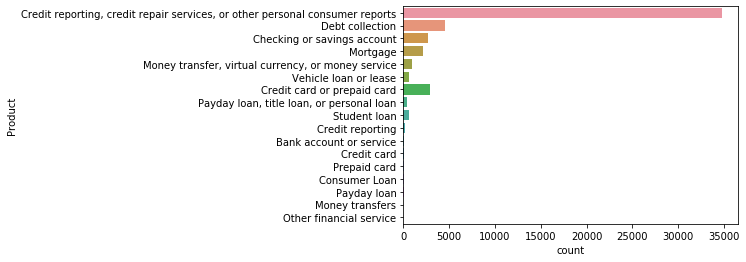

In [4]:
_ = sns.countplot(y = df['Product'])

In [5]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    34827
Debt collection                                                                  4496
Credit card or prepaid card                                                      2944
Checking or savings account                                                      2627
Mortgage                                                                         2142
Money transfer, virtual currency, or money service                                930
Student loan                                                                      612
Vehicle loan or lease                                                             611
Payday loan, title loan, or personal loan                                         415
Credit reporting                                                                  135
Credit card                                                                       102
Bank account or service                               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16775 entries, 1 to 49999
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       16775 non-null  object
 1   Consumer complaint narrative  16775 non-null  object
dtypes: object(2)
memory usage: 393.2+ KB
None
                                              Product  \
1   Credit reporting, credit repair services, or o...   
6   Credit reporting, credit repair services, or o...   
11                                           Mortgage   
31                        Checking or savings account   
43  Credit reporting, credit repair services, or o...   

                         Consumer complaint narrative  
1   Hi, I can't believe you guys are taking advant...  
6   According to the FCRA I am required by law to ...  
11  I applied for XXXX XXXX XXXX ( XXXX ) and got ...  
31  On XXXX, I logged into my mobile banking a

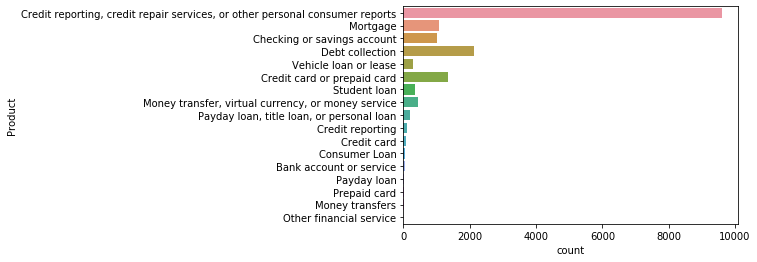

In [6]:
# Data Processing: Drop the fatures that are not used for Neural Networks Training
sel_df = df.iloc[:, [1,5]]
sel_df = sel_df.dropna()
print(sel_df.info())
print(sel_df.head())
_ = sns.countplot(y = sel_df['Product'])

In [7]:
sel_df.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    9620
Debt collection                                                                 2118
Credit card or prepaid card                                                     1359
Mortgage                                                                        1082
Checking or savings account                                                     1020
Money transfer, virtual currency, or money service                               426
Student loan                                                                     348
Vehicle loan or lease                                                            296
Payday loan, title loan, or personal loan                                        197
Credit reporting                                                                 113
Credit card                                                                       76
Bank account or service                                          

In [8]:
# Category selection
# categories = ['Debt collection', 'Mortgage', 'Credit reporting', 'Credit card', 'Student loan', 'Consumer Loan']
exclude = [
    'Credit reporting, credit repair services, or other personal consumer reports', 
    'Credit card or prepaid card', 
    'Money transfer, virtual currency, or money service ',
    'Payday loan, title loan, or personal loan'
]
sel_cat = sel_df.Product.isin(exclude)
sel_df_cat = sel_df[~sel_cat] # select category not in the exclude categories 
sel_df_cat['Product'].value_counts()

Debt collection                                       2118
Mortgage                                              1082
Checking or savings account                           1020
Money transfer, virtual currency, or money service     426
Student loan                                           348
Vehicle loan or lease                                  296
Credit reporting                                       113
Credit card                                             76
Bank account or service                                 58
Consumer Loan                                           44
Payday loan                                              9
Prepaid card                                             4
Money transfers                                          4
Other financial service                                  1
Name: Product, dtype: int64

In [9]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
sel_df_cat = sel_df_cat[col]

sel_df_cat['category_id'] = sel_df_cat['Product'].factorize()[0]
category_id_df = sel_df_cat[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
sel_df_cat.head()

,Product,Consumer complaint narrative,category_id
11,Mortgage,I applied for XXXX XXXX XXXX ( XXXX ) and got ...,0
31,Checking or savings account,"On XXXX, I logged into my mobile banking app f...",1
663,Debt collection,I noticed this reported as a collection on my ...,2
664,Checking or savings account,"On XX/XX/2022, XXXX payments were presented ag...",1
665,Debt collection,Today XX/XX/2022 i told them to put me on thei...,2


**Text Normalization**

In [10]:
# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import re
import string

# Text Normalization
def clean_str(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
        
    text = re.sub(r"\$", " $ ", text) #isolate $
    text = re.sub(r"\%", " % ", text) #isolate %
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    #text = re.sub(r" e g ", " eg ", text)
    #text = re.sub(r" b g ", " bg ", text)
    #text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    #text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    #text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    #removing xxx since it will be treated as importand words by tf-idf vectorization
    text = re.sub(r"x{2,}", " ", text)
    
    # fixing XXX and xxx like as word
    #text = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx",text)
    # removing non ascii
    text = re.sub(r'[^\x00-\x7F]+', "", text) 
    
    # Stemming is important to reduce the number of features (variation from a single word), why stemming?
    # Lemmatization takes way longer time to process
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [11]:
X = sel_df_cat['Consumer complaint narrative']
y = sel_df_cat['Product']
print(X.shape)
print(y.shape)

(5599,)
(5599,)


In [12]:
from time import time
t0 = time()
X = X.map(lambda x: clean_str(x))
print ("\nCleaning time: ", round(time()-t0, 1), "s")


Cleaning time:  13.0 s


In [30]:
#Tfidf Vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(X).toarray()
labels = sel_df_cat.category_id
features.shape
print(features)
print(category_to_id)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.03943637 0.         0.         ... 0.         0.         0.        ]
 [0.07743877 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
{'Mortgage': 0, 'Checking or savings account': 1, 'Debt collection': 2, 'Vehicle loan or lease': 3, 'Student loan': 4, 'Money transfer, virtual currency, or money service': 5, 'Credit reporting': 6, 'Credit card': 7, 'Consumer Loan': 8, 'Bank account or service': 9, 'Payday loan': 10, 'Prepaid card': 11, 'Money transfers': 12, 'Other financial service': 13}


In [14]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  print(feature_names)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['cours' 'fraud' 'seek' ... 'check acct' 'citigold' 'want answer']
# 'Bank account or service':
  . Most correlated unigrams:
. gold
. citigold
  . Most correlated bigrams:
. check acct
. want answer


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['provid date' 'address list' 'job offer' ... 'check account' 'bank'
 'deposit']
# 'Checking or savings account':
  . Most correlated unigrams:
. bank
. deposit
  . Most correlated bigrams:
. close account
. check account


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['privat' 'alreadi' 'mani time' ... 'finaci' 'prosper' 'toyota']
# 'Consumer Loan':
  . Most correlated unigrams:
. prosper
. toyota
  . Most correlated bigrams:
. repres compani
. loan everi


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bought' 'held' 'pin' ... 'card year' 'barclay' 'maci']
# 'Credit card':
  . Most correlated unigrams:
. barclay
. maci
  . Most correlated bigrams:
. american express
. card year


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['numer time' 'use' 'spoke repres' ... 'experian' 'transunion' 'equifax']
# 'Credit reporting':
  . Most correlated unigrams:
. transunion
. equifax
  . Most correlated bigrams:
. report equifax
. contact equifax


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['time confirm' 'bed' 'polic offic' ... 'credit report' 'collect' 'debt']
# 'Debt collection':
  . Most correlated unigrams:
. collect
. debt
  . Most correlated bigrams:
. collect agenc
. credit report


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['year account' 'mail date' 'action' ... 'paypal account' 'coinbas'
 'paypal']
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
. coinbas
. paypal
  . Most correlated bigrams:
. use paypal
. paypal account


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['check' 'ensur accuraci' 'oh' ... 'money miss' 'onlin transfer'
 'miss account']
# 'Money transfers':
  . Most correlated unigrams:
. aka
. qualiti
  . Most correlated bigrams:
. onlin transfer
. miss account


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['got transfer' 'undisclos' 'later sent' ... 'modif' 'escrow' 'mortgag']
# 'Mortgage':
  . Most correlated unigrams:
. escrow
. mortgag
  . Most correlated bigrams:
. mortgag payment
. mortgag compani


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ensur accuraci' 'oh' 'measur ensur' ... 'chang date' 'wait pay'
 'month immedi']
# 'Other financial service':
  . Most correlated unigrams:
. regret
. conn
  . Most correlated bigrams:
. wait pay
. month immedi


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['new' 'attempt' 'answer' ... 'payday loan' 'want compani' 'payday']
# 'Payday loan':
  . Most correlated unigrams:
. hawaii
. payday
  . Most correlated bigrams:
. payday loan
. want compani


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['servic' 'remov' 'ensur accuraci' ... 'card howev' 'prosecut'
 'alreadi account']
# 'Prepaid card':
  . Most correlated unigrams:
. load
. prosecut
  . Most correlated bigrams:
. card howev
. alreadi account


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['consent' 'drawn' 'prioriti' ... 'student loan' 'student' 'navient']
# 'Student loan':
  . Most correlated unigrams:
. student
. navient
  . Most correlated bigrams:
. salli mae
. student loan
['card card' 'assigne' 'horribl' ... 'dealership' 'vehicl' 'car']
# 'Vehicle loan or lease':
  . Most correlated unigrams:
. vehicl
. car
  . Most correlated bigrams:
. car loan
. purchas vehicl


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, sel_df_cat.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0.8641774891774892


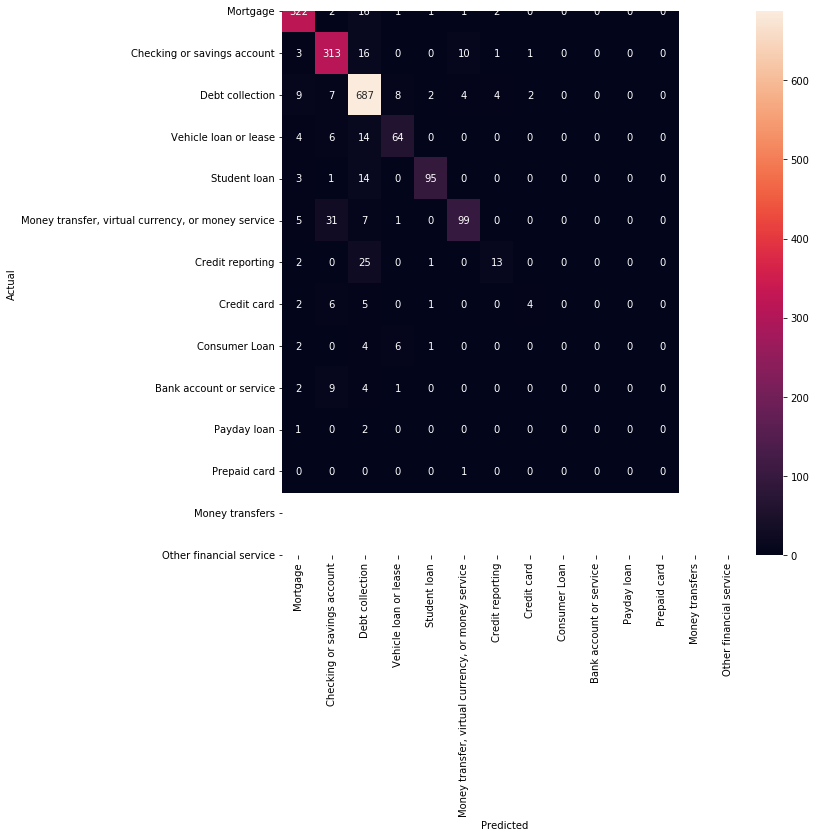

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(sel_df_cat['Consumer complaint narrative'], sel_df_cat['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [19]:
sel_df_cat.head(10)

,Product,Consumer complaint narrative,category_id
11,Mortgage,I applied for XXXX XXXX XXXX ( XXXX ) and got ...,0
31,Checking or savings account,"On XXXX, I logged into my mobile banking app f...",1
663,Debt collection,I noticed this reported as a collection on my ...,2
664,Checking or savings account,"On XX/XX/2022, XXXX payments were presented ag...",1
665,Debt collection,Today XX/XX/2022 i told them to put me on thei...,2
732,Vehicle loan or lease,The loan has been paid off over a month and I ...,3
739,Debt collection,The amount listed was already paid by my denta...,2
785,Vehicle loan or lease,I purchased a XXXX XXXX threw XXXX XXXX XXXX i...,3
815,Checking or savings account,I had an incorrect charge and Duplicate charge...,1
834,Mortgage,Received letter from Caliber dated XX/XX/22 st...,0


In [20]:
debt_collection = sel_df[sel_df['Product'] == "Debt collection"].head(10)
print(debt_collection)

              Product                       Consumer complaint narrative
663   Debt collection  I noticed this reported as a collection on my ...
665   Debt collection  Today XX/XX/2022 i told them to put me on thei...
739   Debt collection  The amount listed was already paid by my denta...
846   Debt collection  The same criminal acts by some person or perso...
955   Debt collection  I have sent in numerous of letters an FTC repo...
1486  Debt collection  I have a credit card with Amazon for XXXX. I n...
1503  Debt collection  I have sent in numerous of letters an FTC repo...
1601  Debt collection  the company is CREDIT ACCEPTANCE CORP Date ope...
1632  Debt collection  PayPal- {$400.00}. Illegally incarcerated. The...
1794  Debt collection  I have sent in numerous of letters an FTC repo...


In [21]:
print(clf.predict(count_vect.transform(debt_collection['Consumer complaint narrative'])))

['Debt collection' 'Debt collection' 'Debt collection' 'Debt collection'
 'Debt collection' 'Debt collection' 'Debt collection' 'Debt collection'
 'Debt collection' 'Debt collection']


In [22]:
student_loan = sel_df[sel_df['Product'] == "Student loan"].head(10)
print(student_loan)

            Product                       Consumer complaint narrative
2554   Student loan  I am resubmitting a compliant about Sallie Mae...
6414   Student loan  I have not been updated on the status of publi...
7670   Student loan  Earlier in XXXX I enrolled in a program with S...
8925   Student loan  Zuntafi XXXX  for future pilots does not menti...
10885  Student loan  On XX/XX/2022, FedStudentLoan Servicing, PHEAA...
10995  Student loan  I attended a XXXX XXXX XXXX university from XX...
11754  Student loan  Sent this affidavit to Sallie Mae Bank in rega...
11813  Student loan  Towards the end of XXXX/beginning of XXXX, I w...
13168  Student loan  The only student loans that I took out was whe...
13195  Student loan  I recieved a phone call from Navient about stu...


In [23]:
print(clf.predict(count_vect.transform(student_loan['Consumer complaint narrative'])))

['Debt collection' 'Debt collection' 'Debt collection' 'Debt collection'
 'Debt collection' 'Debt collection' 'Debt collection' 'Debt collection'
 'Debt collection' 'Debt collection']


In [24]:
# Deep Learning libs import

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential, Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [25]:
df = pd.read_csv('complaints.csv', nrows=500000) #taking more large size
print(df.shape)
df.head()

(500000, 18)


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-08-11,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",IL,60431.0,NaN,NaN,Web,2022-08-11,Closed with explanation,Yes,NaN,5868234
1,2022-06-20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,"Hi, I can't believe you guys are taking advant...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AL,35211.0,NaN,Consent provided,Web,2022-06-20,Closed with non-monetary relief,Yes,NaN,5687460
2,2022-08-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,TX,78227.0,NaN,NaN,Web,2022-08-12,In progress,Yes,NaN,5873290
3,2022-08-10,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,CONTRACT CALLERS INC,NY,10016.0,NaN,NaN,Web,2022-08-10,Closed with explanation,Yes,NaN,5864261
4,2022-08-19,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,33414.0,Servicemember,NaN,Web,2022-08-19,In progress,Yes,NaN,5895588


In [26]:
sel_df = df.iloc[:, [1,5]]
sel_df = sel_df.dropna()
exclude = [
    'Credit reporting, credit repair services, or other personal consumer reports', 
    'Credit card or prepaid card', 
    'Money transfer, virtual currency, or money service ',
    'Payday loan, title loan, or personal loan'
]
sel_cat = sel_df.Product.isin(exclude)
sel_df_cat = sel_df[~sel_cat] # select category not in the exclude categories 
sel_df_cat['Product'].value_counts()

Debt collection                                       23176
Mortgage                                              10526
Checking or savings account                           10001
Money transfer, virtual currency, or money service     4430
Vehicle loan or lease                                  3026
Student loan                                           2901
Credit reporting                                        712
Credit card                                             482
Bank account or service                                 414
Consumer Loan                                           269
Payday loan                                              49
Prepaid card                                             34
Money transfers                                          34
Other financial service                                   9
Name: Product, dtype: int64

In [27]:
X = sel_df_cat['Consumer complaint narrative']
y = sel_df_cat['Product']
print(X.shape)
print(y.shape)

(56063,)
(56063,)


In [28]:
from time import time
t0 = time()
X = X.map(lambda x: clean_str(x))
print ("\nCleaning time: ", round(time()-t0, 1), "s")


Cleaning time:  139.4 s


In [28]:
from tensorflow.contrib import learn

# Preprocessing to encode the text to sequences
max_doc_len = max([len(x.split(" ")) for x in X])
vocab_processor = learn.preprocessing.VocabularyProcessor(max_doc_len)
vocab_processor.fit_transform(X)
vocab_size=len(vocab_processor.vocabulary_)

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


In [29]:
print(max_doc_len)
print(vocab_size)

1928
42590


In [30]:
token = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ', lower=True, split=' ')
token.fit_on_texts(X)
X_train_seq = token.texts_to_sequences(X)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_doc_len)


print(X_train_seq.shape)

(105719, 1928)


In [31]:
le = LabelEncoder()
y_en = le.fit_transform(y)
print(np.unique(y_en, return_counts=True))

y_en = to_categorical(y_en, num_classes= 15)
print(y_en)
print(y_en.shape)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([ 9182,   500,  5856, 11688, 20011, 26520,   103,   910, 21121,
         177,  1104,   944,  7418,   175,    10]))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(105719, 15)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_train_seq, y_en,test_size=0.15)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(89861, 1928)
(89861, 15)
(15858, 1928)
(15858, 15)


In [33]:
max_features = vocab_size
maxlen = max_doc_len
embedding_dims = 50
filters = 250
kernel_size = 5
hidden_dims = 250

def ProductClassifier():
    model = Sequential()
    # Add embedding layer
    model.add(Embedding(max_features,
                        embedding_dims,
                        input_length=maxlen))
    model.add(Dropout(0.2))
    
    # Conv1D for filtering layer
    model.add(Conv1D(filters,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    # max pooling:
    model.add(GlobalMaxPooling1D())

    # add a hidden layer:
    model.add(Dense(hidden_dims))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))

    # Using Softmax for multiclass classifications
    # model.add(Dense(18))
    model.add(Dense(15))
    model.add(Activation('softmax'))
    return model

In [34]:
model = ProductClassifier()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1928, 50)          2129500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1928, 50)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1924, 250)         62750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

In [35]:
fit = model.fit(X_train, y_train,
          batch_size=50,
          epochs=5,
          #shuffle=True,
          validation_data=(X_test, y_test))

Train on 89861 samples, validate on 15858 samples
Epoch 1/5
89861/89861 [==============================] - 108s 1ms/step - loss: 0.7121 - acc: 0.7833 - val_loss: 0.4950 - val_acc: 0.8518
Epoch 2/5
89861/89861 [==============================] - 106s 1ms/step - loss: 0.4549 - acc: 0.8627 - val_loss: 0.4703 - val_acc: 0.8569
Epoch 3/5
89861/89861 [==============================] - 106s 1ms/step - loss: 0.3852 - acc: 0.8829 - val_loss: 0.4778 - val_acc: 0.8560
Epoch 4/5
89861/89861 [==============================] - 106s 1ms/step - loss: 0.3318 - acc: 0.8978 - val_loss: 0.4925 - val_acc: 0.8564
Epoch 5/5
82600/89861 [==========================>...] - ETA: 8s - loss: 0.2819 - acc: 0.9119

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


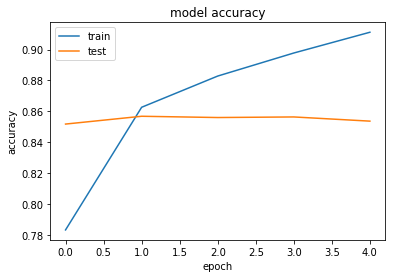

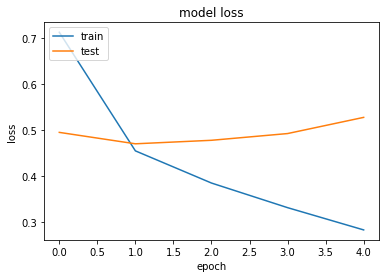

In [36]:
print(fit.history.keys())
# summarize history for accuracy
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
def sentences_to_sequences(X):
    token = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ', lower=True, split=' ')
    token.fit_on_texts(X)
    X_seq = token.texts_to_sequences(X)
    X_seq = sequence.pad_sequences(X_seq, maxlen=max_doc_len)
    return X_seq

In [38]:
index = 228
x_test = np.array([sel_df_cat.iloc[index, 1]])
x_result = np.array([sel_df_cat.iloc[index, 0]])
X_test_indices = sentences_to_sequences(x_test)
le = LabelEncoder()
le.fit_transform(sel_df_cat['Product'])
print('Narrative: ' + x_test[0] + ', Expected Product: ' + x_result[0] + ', Prediction Product: '+  le.inverse_transform([np.argmax(model.predict(X_test_indices))]))

["Narrative: On or about XXXX XXXX, 2016, I received a telephone call from Wells Fargo Bank regarding an inquiry I made about a VA Mortgage. I informed the lady that I was concerned about the repeated inquiries in my credit report but she assured me that inquiries that are dated within XXXX days apart qualify as one inquiry. I was then transferred to a XXXX XXXX XXXX. XXXX XXXX asked me a lot of questions regarding my financial history and questions originating from the VA Lenders ' Manual. After I answered all of the questions XXXX XXXX pulled my full credit report. I was not given an opportunity to submit a written credit application, just the verbal one with XXXX XXXX. XXXX XXXX informed me that he pulled my credit report from all XXXX credit bureaus and that he would utilize the credit score that was in the middle. He then informed me that according to such credit score, I qualify for the VA Mortgage per VA regulations regarding the credit scores of veterans. Then, XXXX XXXX inform

In [39]:
x_test = np.array(['I have a problem with my credit. This is really sad.'])
X_test_indices = sentences_to_sequences(x_test)
le = LabelEncoder()
le.fit_transform(sel_df_cat['Product'])
print('Narrative: ' + x_test[0] + ', Prediction Product: '+  le.inverse_transform([np.argmax(model.predict(X_test_indices))]))

['Narrative: I have a problem with my credit. This is really sad., Prediction Product: Consumer Loan']
